In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [9]:
def calculate_continuous_label(original_image, modified_image):
    # Calculate the absolute difference across color channels
    difference = np.abs(original_image - modified_image)
    
    # Take the mean across the color channels to get a single value per pixel
    continuous_label = np.mean(difference, axis=-1)
    return continuous_label

In [10]:
def apply_color_map(array):
    # Normalize the array to 0-255 if it’s not in that range
    if array.dtype != np.uint8:
        array = (array / array.max() * 255).astype(np.uint8)
    
    # Apply a color map
    color_mapped_image = cv2.applyColorMap(array, cv2.COLORMAP_JET)
    return color_mapped_image

In [11]:

def visualize_image(array, title="Image"):
    # Display the image
    plt.imshow(cv2.cvtColor(array, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
    plt.title(title)
    plt.axis('off')
    plt.show()

In [12]:
original_img = cv2.imread("../datasets/testing_images/road.jpg")
modified_img = cv2.imread("../datasets/testing_images/new_blended_img.jpg")

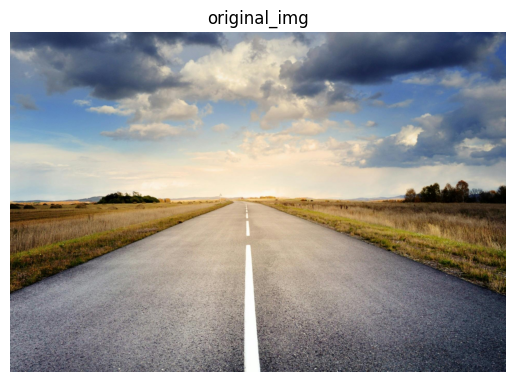

In [13]:
visualize_image(original_img, title="original_img")

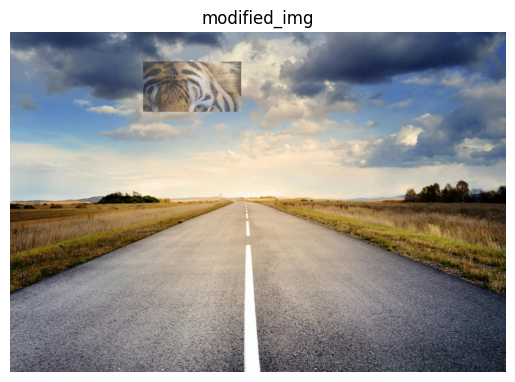

In [14]:
visualize_image(modified_img, title="modified_img")

In [15]:
continuous_arr = calculate_continuous_label(original_img, modified_img)

In [16]:
color_mapped_img_continuous = apply_color_map(continuous_arr)

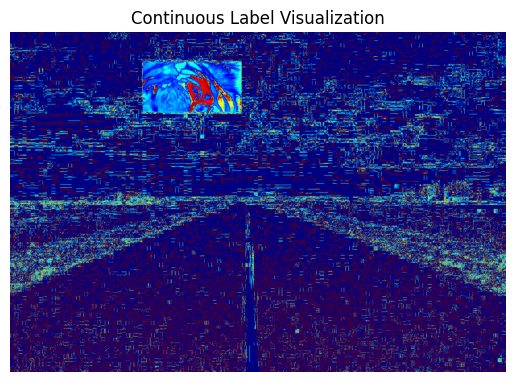

In [17]:
visualize_image(color_mapped_img_continuous, title="Continuous Label Visualization")

In [18]:
def calculate_binary_label(original_image, modified_image):
    # Calculate the binary label by checking if there is any difference in the channels
    binary_label = np.max(original_image != modified_image, axis=-1).astype(np.uint8)
    return binary_label

In [19]:
binary_label = calculate_binary_label(original_img, modified_img)

In [20]:
def calculate_logistic_label(binary_label, continuous_label, k=1, y0=10):
    # Calculate the logistic label based on continuous label values
    logistic_label = binary_label / (1 + np.exp(-k * (continuous_label - y0)))
    return logistic_label

In [21]:
logistic_arr = calculate_logistic_label(binary_label, continuous_arr, k=5, y0=10)

In [22]:
color_mapped_img_logistic = apply_color_map(logistic_arr)

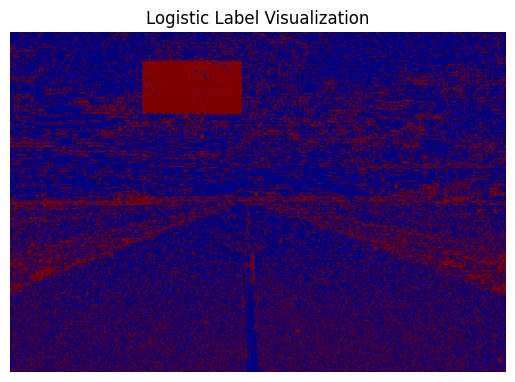

In [23]:
visualize_image(color_mapped_img_logistic, title="Logistic Label Visualization")

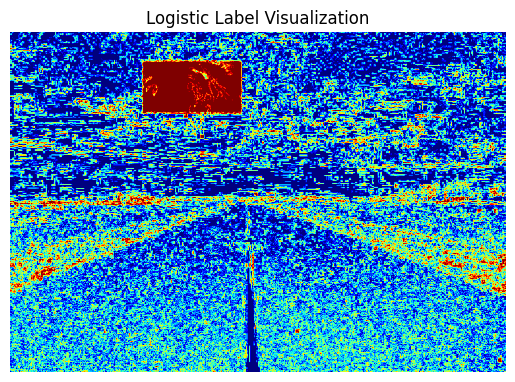

In [24]:
plt.imshow(logistic_arr, cmap="jet")
plt.title("Logistic Label Visualization")
plt.axis("off")
plt.show()